# Individual Assignment

Import all the relevant packages

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize

### 1. Data Retrieval
In this step, I chose 10 actively traded firms and use yfinance to pull data from Yahoo Finance for 2020-2024.

In [17]:
Tickers = ["AAPL", "MSFT", "GOOGL", "SMCI", "TSLA", "NVDA", "META", "PCG", "JPM", "AMZN"]
data = yf.download(Tickers, start="2020-01-01", end="2024-12-31")
# save the data to a CSV file in order to reproduce the results
data.to_csv("stock_data.csv")
data

/tmp/ipykernel_34946/4139422488.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Tickers, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  10 of 10 completed


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL         JPM        META   
Date                                                                     
2020-01-02   72.620834   94.900497   68.026024  120.733543  208.635406   
2020-01-03   71.914810   93.748497   67.670166  119.140312  207.531464   
2020-01-06   72.487846   95.143997   69.473846  119.045570  211.440048   
2020-01-07   72.146942   95.343002   69.339653  117.021729  211.897507   
2020-01-08   73.307518   94.598503   69.833183  117.934624  214.045731   
...                ...         ...         ...         ...         ...   
2024-12-23  254.655716  225.059998  194.171051  235.713242  598.856018   
2024-12-24  257.578674  229.050003  195.647552  239.589218  606.742920   
2024-12-26  258.396667  227.050003  195.138763  240.409912  602.350220   
2024-12-27  254.974930  223.750000  192.305450  238.462036  598.816040   
2024-12-30  251.593079  221.300003  190.789032  236.632812  590.260254   

Price                                                                 ...  \
Ticker            MSFT        NVDA        PCG       SMCI        TSLA  ...   
Date                                                                  ...   
2020-01-02  153.042313    5.971747  10.796280   2.363000   28.684000  ...   
2020-01-03  151.136673    5.876162  10.517665   2.344000   29.534000  ...   
2020-01-06  151.527313    5.900806  10.328608   2.327000   30.102667  ...   
2020-01-07  150.145721    5.972245  10.527615   2.310000   31.270666  ...   
2020-01-08  152.537292    5.983446  10.557467   2.307000   32.809334  ...   
...                ...         ...        ...        ...         ...  ...   
2024-12-23  433.583038  139.647446  19.935814  32.400002  430.600006  ...   
2024-12-24  437.647369  140.197372  20.165190  34.330002  462.279999  ...   
2024-12-26  436.432068  139.907410  20.155216  33.740002  454.130005  ...   
2024-12-27  428.881104  136.987885  20.085405  31.980000  431.660004  ...   
2024-12-30  423.202911  137.467804  20.075434  30.680000  417.410004  ...   

Price          Volume                                                    \
Ticker           AAPL      AMZN     GOOGL       JPM      META      MSFT   
Date                                                                      
2020-01-02  135480400  80580000  27278000  10803700  12077100  22622100   
2020-01-03  146322800  75288000  23408000  10386800  11188400  21116200   
2020-01-06  118387200  81236000  46768000  10259000  17058900  20813700   
2020-01-07  108872000  80898000  34330000  10531300  14912400  21634100   
2020-01-08  132079200  70160000  35314000   9695300  13475000  27746500   
...               ...       ...       ...       ...       ...       ...   
2024-12-23   40858800  28070000  25675000   8611500  10205800  19152500   
2024-12-24   23234700  15007500  10403300   3729100   4726100   7164500   
2024-12-26   27237100  16146700  12046600   4451800   6081400   8194200   
2024-12-27   42355300  27367100  18891400   5730200   8084200  18117700   
2024-12-30   35557500  28321200  14264700   5723800   7025900  13158700   

Price                                                 
Ticker           NVDA       PCG      SMCI       TSLA  
Date                                                  
2020-01-02  237536000   8932400   4178000  142981500  
2020-01-03  205384000   5036400    302000  266677500  
2020-01-06  262636000   7105400    933000  151995000  
2020-01-07  314856000   5492200    387000  268231500  
2020-01-08  277108000   7008900   3537000  467164500  
...               ...       ...       ...        ...  
2024-12-23  176053500  14179200  26032300   72698100  
2024-12-24  105157000   4614500  41339700   59551800  
2024-12-26  116205600   4469900  28146700   76366400  
2024-12-27  170582600  10354200  32070600   82666800  
2024-12-30  167734700   9078200  32119900   64941000  

[1257 rows x 50 columns]

We load data again and clean data to ensure it is.

In [18]:
data = pd.read_csv("stock_data.csv", header=[0,1], index_col=0, parse_dates=True)
# Check for missing values in the dataset
print(data.isnull().sum().sum())
# Check for duplicate rows in the dataset
print(data.duplicated().sum())
data

0
0


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL         JPM        META   
Date                                                                     
2020-01-02   72.620834   94.900497   68.026024  120.733543  208.635406   
2020-01-03   71.914810   93.748497   67.670166  119.140312  207.531464   
2020-01-06   72.487846   95.143997   69.473846  119.045570  211.440048   
2020-01-07   72.146942   95.343002   69.339653  117.021729  211.897507   
2020-01-08   73.307518   94.598503   69.833183  117.934624  214.045731   
...                ...         ...         ...         ...         ...   
2024-12-23  254.655716  225.059998  194.171051  235.713242  598.856018   
2024-12-24  257.578674  229.050003  195.647552  239.589218  606.742920   
2024-12-26  258.396667  227.050003  195.138763  240.409912  602.350220   
2024-12-27  254.974930  223.750000  192.305450  238.462036  598.816040   
2024-12-30  251.593079  221.300003  190.789032  236.632812  590.260254   

Price                                                                 ...  \
Ticker            MSFT        NVDA        PCG       SMCI        TSLA  ...   
Date                                                                  ...   
2020-01-02  153.042313    5.971747  10.796280   2.363000   28.684000  ...   
2020-01-03  151.136673    5.876162  10.517665   2.344000   29.534000  ...   
2020-01-06  151.527313    5.900806  10.328608   2.327000   30.102667  ...   
2020-01-07  150.145721    5.972245  10.527615   2.310000   31.270666  ...   
2020-01-08  152.537292    5.983446  10.557467   2.307000   32.809334  ...   
...                ...         ...        ...        ...         ...  ...   
2024-12-23  433.583038  139.647446  19.935814  32.400002  430.600006  ...   
2024-12-24  437.647369  140.197372  20.165190  34.330002  462.279999  ...   
2024-12-26  436.432068  139.907410  20.155216  33.740002  454.130005  ...   
2024-12-27  428.881104  136.987885  20.085405  31.980000  431.660004  ...   
2024-12-30  423.202911  137.467804  20.075434  30.680000  417.410004  ...   

Price          Volume                                                    \
Ticker           AAPL      AMZN     GOOGL       JPM      META      MSFT   
Date                                                                      
2020-01-02  135480400  80580000  27278000  10803700  12077100  22622100   
2020-01-03  146322800  75288000  23408000  10386800  11188400  21116200   
2020-01-06  118387200  81236000  46768000  10259000  17058900  20813700   
2020-01-07  108872000  80898000  34330000  10531300  14912400  21634100   
2020-01-08  132079200  70160000  35314000   9695300  13475000  27746500   
...               ...       ...       ...       ...       ...       ...   
2024-12-23   40858800  28070000  25675000   8611500  10205800  19152500   
2024-12-24   23234700  15007500  10403300   3729100   4726100   7164500   
2024-12-26   27237100  16146700  12046600   4451800   6081400   8194200   
2024-12-27   42355300  27367100  18891400   5730200   8084200  18117700   
2024-12-30   35557500  28321200  14264700   5723800   7025900  13158700   

Price                                                 
Ticker           NVDA       PCG      SMCI       TSLA  
Date                                                  
2020-01-02  237536000   8932400   4178000  142981500  
2020-01-03  205384000   5036400    302000  266677500  
2020-01-06  262636000   7105400    933000  151995000  
2020-01-07  314856000   5492200    387000  268231500  
2020-01-08  277108000   7008900   3537000  467164500  
...               ...       ...       ...        ...  
2024-12-23  176053500  14179200  26032300   72698100  
2024-12-24  105157000   4614500  41339700   59551800  
2024-12-26  116205600   4469900  28146700   76366400  
2024-12-27  170582600  10354200  32070600   82666800  
2024-12-30  167734700   9078200  32119900   64941000  

[1257 rows x 50 columns]

Therefore, we can confirm that the data has no missing values and duplicated values. We can further do our data exploration now.

### 2. Data Exploration
(1) Present the head and tail of a wide data frame that shows the closing prices for each stock.


In [19]:
# Extract the Close prices for each stock
close = data["Close"]
df = close.copy()

# Present the first 5 rows of each stock's Close prices
print(close.head())

# Present the last 5 rows of each stock's Close prices
print(close.tail())

Ticker           AAPL       AMZN      GOOGL         JPM        META  \
Date                                                                  
2020-01-02  72.620834  94.900497  68.026024  120.733543  208.635406   
2020-01-03  71.914810  93.748497  67.670166  119.140312  207.531464   
2020-01-06  72.487846  95.143997  69.473846  119.045570  211.440048   
2020-01-07  72.146942  95.343002  69.339653  117.021729  211.897507   
2020-01-08  73.307518  94.598503  69.833183  117.934624  214.045731   

Ticker            MSFT      NVDA        PCG   SMCI       TSLA  
Date                                                           
2020-01-02  153.042313  5.971747  10.796280  2.363  28.684000  
2020-01-03  151.136673  5.876162  10.517665  2.344  29.534000  
2020-01-06  151.527313  5.900806  10.328608  2.327  30.102667  
2020-01-07  150.145721  5.972245  10.527615  2.310  31.270666  
2020-01-08  152.537292  5.983446  10.557467  2.307  32.809334  
Ticker            AAPL        AMZN       GOOGL        

(2) Create a single plot showing the closing prices of all ten stocks over the five year period.

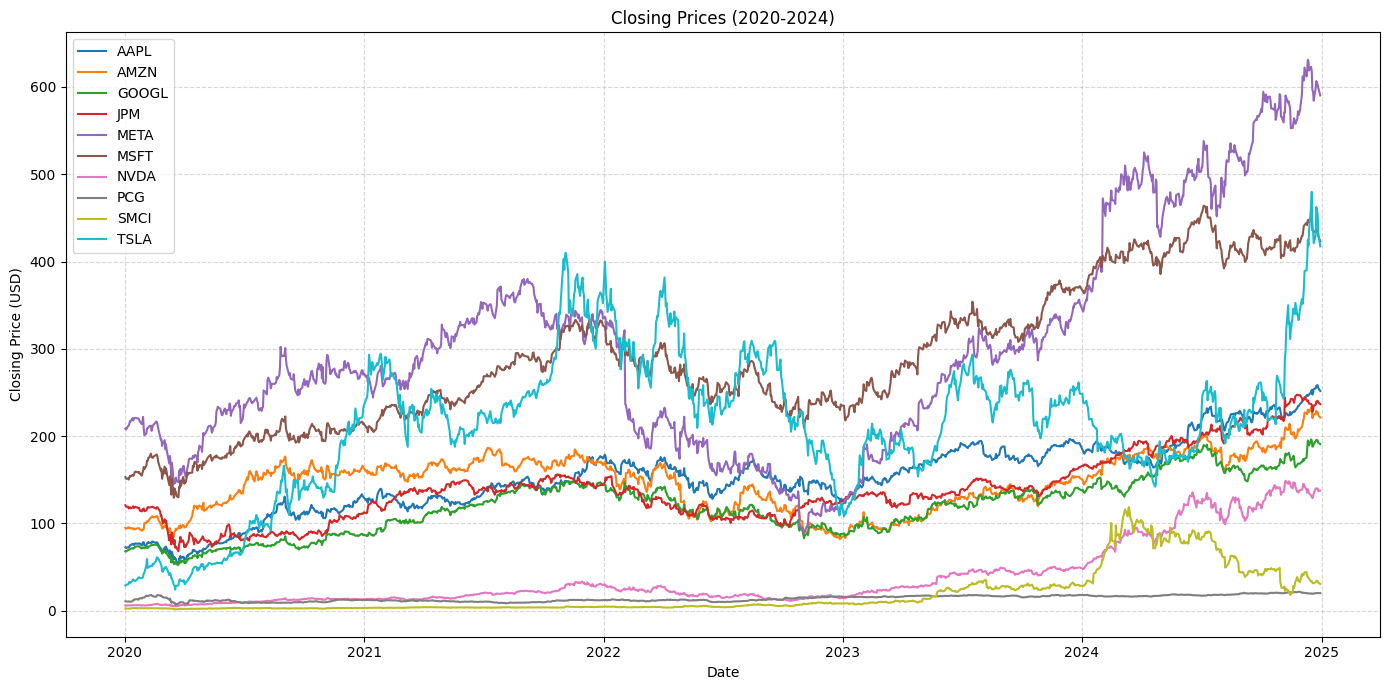

In [20]:
plt.figure(figsize=(14, 7))
for ticker in df.columns:
    plt.plot(df.index, df[ticker], label=ticker)
plt.title("Closing Prices (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Backtesting
In this section, we will implement and backtest a Bollinger Bands Mean Reversion strategy for each stock.

(1) Generate signals and positions that follows the Bollinger Bands Mean Reversion Strategy.



In [21]:
def Bollinger_strategy(dfi, window=20):
    sma = dfi.rolling(window).mean()
    upper = sma + 2 * dfi.rolling(window).std()
    lower = sma - 2 * dfi.rolling(window).std()

    # Generate Entry/Exit buy/sell signals
    position = 0
    positions = []
    for i in range(len(dfi)):
        if dfi.iloc[i] < lower.iloc[i] and position == 0:
            position = 1  # Enter long
        elif dfi.iloc[i] > upper.iloc[i] and position == 0:
            position = -1  # Enter short
        elif position == 1 and dfi.iloc[i] > sma.iloc[i]:
            position = 0  # Exit long
        elif position == -1 and dfi.iloc[i] < sma.iloc[i]:
            position = 0  # Exit short
        positions.append(position)
    return pd.Series(positions, index=dfi.index)


(2) Calculate the simple daily returns. And then, apply the Bollinger strategy that we have defined above to calculate the strategy daily returns. 

In [22]:
# Apply the Bollinger Bands strategy to each ticker
strategy_returns = {}
buyhold_returns = {}

for ticker in df.columns:
    prices = df[ticker]
    positions = Bollinger_strategy(prices)
    # Calculate simple daily returns and strategy returns
    daily_returns = prices.pct_change().fillna(0)
    # Shift positions in order to avoid lookahead bias
    strat_returns = daily_returns * positions.shift().fillna(0)

    strategy_returns[ticker] = strat_returns
    buyhold_returns[ticker] = daily_returns


(3) Display the end-of-period cumulative return for the strategy vs. buy+hold

In [23]:
# Combine all strategy returns into a DataFrame
stra_returns_df = pd.DataFrame(strategy_returns)
buyhold_returns_df = pd.DataFrame(buyhold_returns)

# Calculate cumulative returns for the strategy and buy-and-hold
cumulative_strategy = (1 + stra_returns_df).cumprod() - 1
cumulative_buyhold = (1 + buyhold_returns_df).cumprod() - 1

# Display the end-of-period cumulative return for each stock
summary = pd.DataFrame({
    "Strategy Cumulative Return": cumulative_strategy.iloc[-1],
    "Buy&Hold Cumulative Return": cumulative_buyhold.iloc[-1]
})
print(summary)

       Strategy Cumulative Return  Buy&Hold Cumulative Return
AAPL                    -0.429186                    2.464475
AMZN                    -0.021689                    1.331916
GOOGL                   -0.226073                    1.804648
JPM                      0.207146                    0.959959
META                    -0.292448                    1.829147
MSFT                     0.370591                    1.765267
NVDA                    -0.533450                   22.019695
PCG                     -0.049783                    0.859477
SMCI                    -0.540804                   11.983496
TSLA                    -0.957668                   13.552015


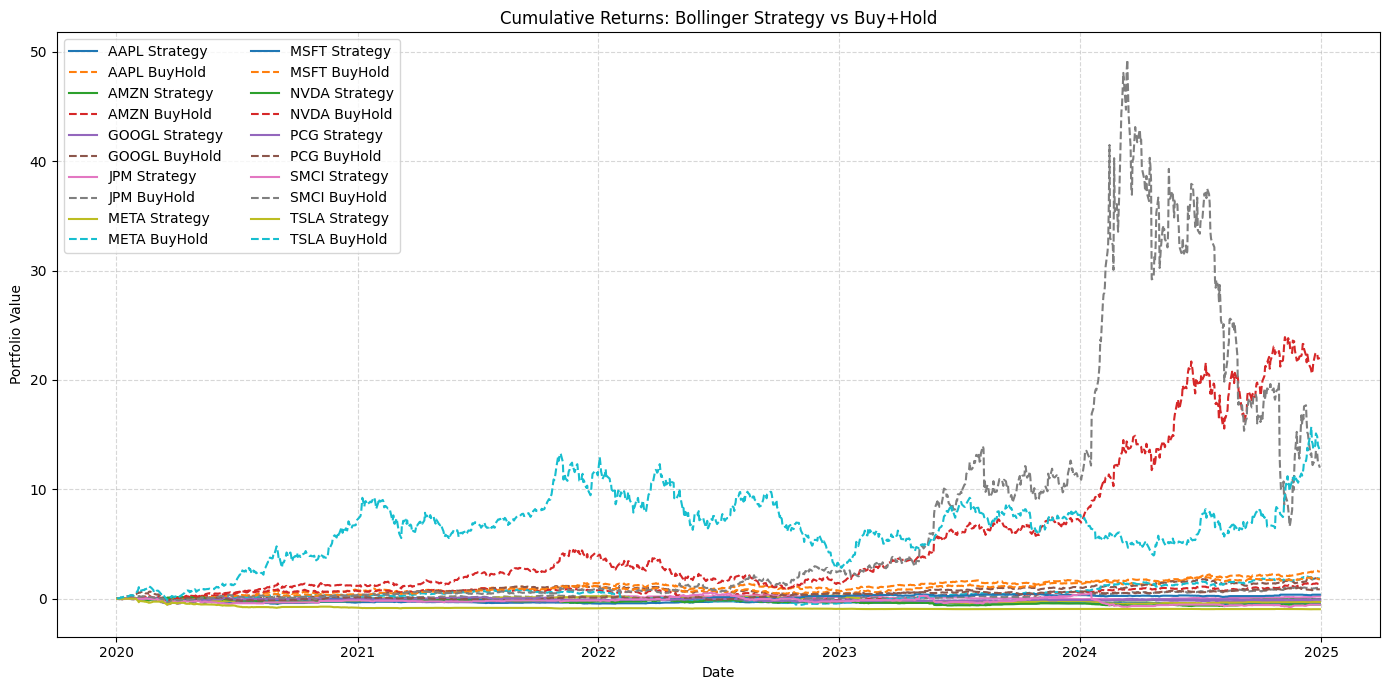

In [24]:
plt.figure(figsize=(14, 7))
for ticker in df.columns:
    plt.plot(cumulative_strategy.index, cumulative_strategy[ticker], label=f"{ticker} Strategy")
    plt.plot(cumulative_buyhold.index, cumulative_buyhold[ticker], '--', label=f"{ticker} BuyHold")
plt.title("Cumulative Returns: Bollinger Strategy vs Buy+Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend(loc="upper left", ncol=2, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Portfolio Management
(1) Visualise the portfolio by plotting the correlation matrix of its simple daily returns.

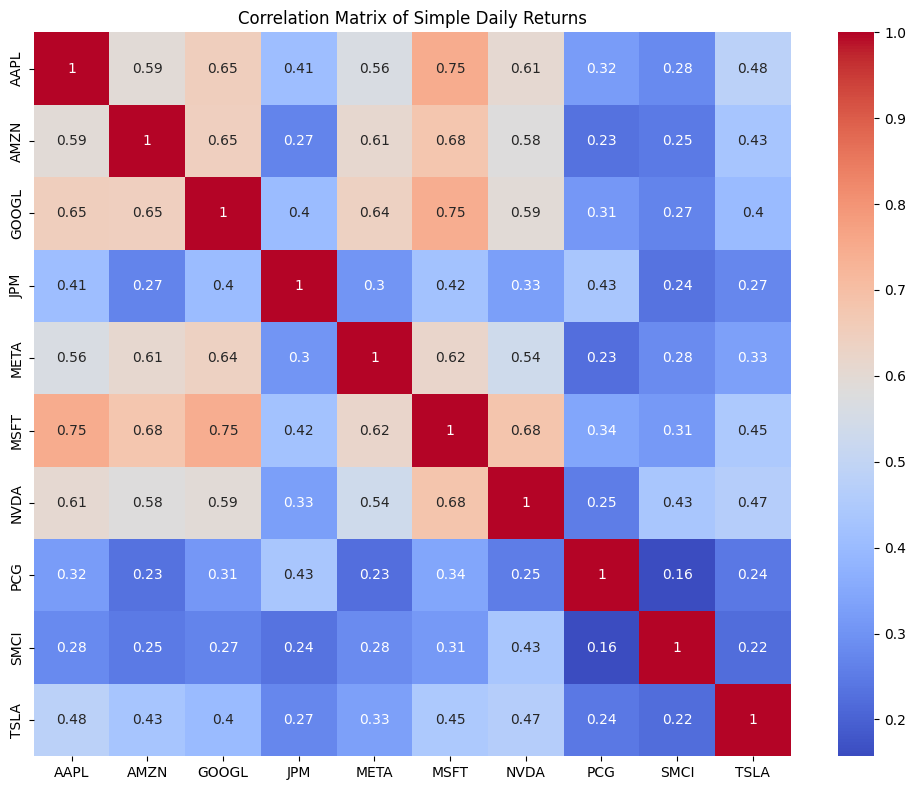

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(buyhold_returns_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Simple Daily Returns")
plt.tight_layout()
plt.show()

(2) Create a portfolio of the 10 stocks with equal initial weights.

In [26]:
# Although we know there are 10 stocks, we can still generalize the code to work with any number of stocks.
n = len(df.columns)
weights = np.ones(n) / n 
# Therefore, we assign equal weights (1/n) to each stock in the portfolio. 

(3) Calculate the portfolio returns and cumulative returns.

In [27]:
portfolio_returns = buyhold_returns_df.dot(weights)
portfolio_cumreturns = (1 + portfolio_returns).cumprod() - 1

(4) Calculate the daily standard deviation of portfolio returns as a risk measurement.

In [28]:
portfolio_std = portfolio_returns.std()

### 5. Portfolio Optimisation
(1) Implement simple portfolio optimisation by maximising the Sharpe Ratio.

In [29]:
def negative_sharpe(weights, returns):
    portfolio_return = np.dot(returns.mean(), weights)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sharpe_ratio = portfolio_return / portfolio_std
    return -sharpe_ratio  # We minimize the negative Sharpe ratio
